In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split#For splitting
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.metrics import fbeta_score, make_scorer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from optuna.integration import LightGBMPruningCallback

import optuna  # pip install optuna
from sklearn.metrics import log_loss


import warnings
warnings.filterwarnings("ignore")

from sklearn.utils.fixes import loguniform

#features_train, features_test, labels_train, labels_test = train_test_split(
#    features, labels, test_size=0.3, random_state=42
#)


C:\Users\Pearse\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def concatenated_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df_all = concatenated_df(train, test)

train.name = 'Training Set'
test.name = 'Test Set'
df_all.name = 'All Sets' 

dfs = [train, test]


train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
#Create submission file using an empty/dummy dataframe
gender_submission = pd.DataFrame(columns=['PassengerId', 'Survived'])
gender_submission.head() 

,PassengerId,Survived


In [7]:
gender_submission.PassengerId = test.PassengerId
gender_submission.head()

,PassengerId,Survived
0,892,NaN
1,893,NaN
2,894,NaN
3,895,NaN
4,896,NaN


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']
# To see the correlation of the 'Age' feature and other features.
# Age is not correlated with 'PassengerId', so it doesn't have any effect on the target.
# 'Survived' is the feature I'm trying to predict. 

,Feature 1,Feature 2,Correlation Coefficient
7,Age,PassengerId,0.028814
19,Age,Survived,0.077221
23,Age,Parch,0.150917
26,Age,Fare,0.178740
31,Age,SibSp,0.243699
39,Age,Pclass,0.408106
42,Age,Age,1.000000


In [11]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Pclass']
# It is noteworthy that 'Pclass' and 'Survived' features are correlated.

,Feature 1,Feature 2,Correlation Coefficient
5,Pclass,Parch,0.018322
13,Pclass,PassengerId,0.038354
16,Pclass,SibSp,0.060832
35,Pclass,Survived,0.338481
38,Pclass,Age,0.408106
40,Pclass,Fare,0.558629
44,Pclass,Pclass,1.000000


In [12]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))
# Median age of 'Pclass' groups is the best choice because of its high correlation with Age (0.408) and Survived (0.338). 
# It is also more logical to group ages by passenger classes instead of other features.
# When 'Pclass' increases (1 being the highest), the median age for both males and females also increases. 
# However, females tend to have slightly lower median Age than males. 

df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
# To fill the missing values in Age with the medians of Sex and Pclass groups (28).

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [13]:
age_by_pclass_sex

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [14]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [15]:
median_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].median()[3][0][0]
df_all['Fare'] = df_all['Fare'].fillna(median_fare)
median_fare

7.8542

In [16]:
df_all.drop('Cabin', axis=1, inplace=True)

In [17]:
emb_imp = SimpleImputer(strategy='most_frequent')
emb = ['Embarked']
emb_imp.fit(df_all[emb])
df_all[emb] = emb_imp.fit_transform(df_all[emb])

In [18]:
#Drop ID from train and test
df_all.drop('PassengerId', axis=1, inplace=True)
df_all.drop('Ticket', axis=1, inplace=True)
df_all.drop('Name', axis=1, inplace=True)

In [19]:
# We can separate catgorical and numerical column
#categ_cols == categorical columns . Date column excluded
categ_cols = df_all.select_dtypes(include=['object', 'category']).columns

# num column == numerical columns + date column included
num_cols = [col for col in df_all.columns if col not in categ_cols]
print(f'The Categorical Columns are: {categ_cols}')
print(f'The Numerical Columns are: {num_cols}')

The Categorical Columns are: Index(['Embarked', 'Sex'], dtype='object')
The Numerical Columns are: ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived']


In [20]:
categ_cols

Index(['Embarked', 'Sex'], dtype='object')

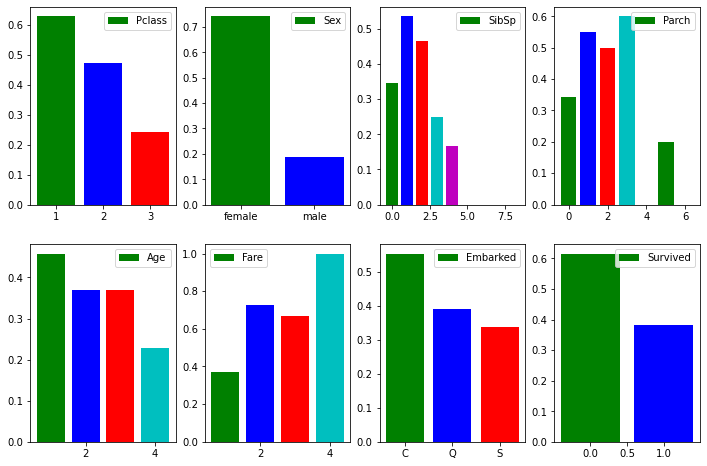

In [21]:
train_data, test_data = divide_df(df_all)

#Create a new copy of the data
new_data = train_data.copy()
#Divide Age and Fare into 4 groups
new_data['Fare'] = pd.cut(new_data['Fare'], 4, labels=[1, 2, 3, 4])
new_data['Age'] = pd.cut(new_data['Age'], 4, labels=[1, 2, 3, 4])


#Plot survival rates among groups 
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Age' ,'Fare', 'Embarked', 'Survived']
fig, ax = plt.subplots(2, 4, figsize=(12, 8))
for i, axi in enumerate(ax.flat):
    if i ==7: 
        temp = new_data['Survived'].value_counts()/(len(new_data))
        axi.bar(temp.index, temp.values, label = columns[i], color = ['g', 'b', 'r', 'c', 'm'])
        axi.legend()
    else:    
        temp = new_data.groupby(columns[i])['Survived'].mean()
        axi.bar(temp.index, temp.values, label = columns[i], color = ['g', 'b', 'r', 'c', 'm'])
        axi.legend()



In [22]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_all[categ_cols]))
# Remove categorical columns (will replace with one-hot encoding)
num_cols = df_all.drop(categ_cols, axis=1)


# Add one-hot encoded columns to numerical features
df_all = pd.concat([num_cols, OH_cols], axis=1)
df_all

,Age,Fare,Parch,Pclass,SibSp,Survived,0,1,2,3,4
0,22.0,7.2500,0,3,1,0.0,0.0,0.0,1.0,0.0,1.0
1,38.0,71.2833,0,1,1,1.0,1.0,0.0,0.0,1.0,0.0
2,26.0,7.9250,0,3,0,1.0,0.0,0.0,1.0,1.0,0.0
3,35.0,53.1000,0,1,1,1.0,0.0,0.0,1.0,1.0,0.0
4,35.0,8.0500,0,3,0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,8.0500,0,3,0,NaN,0.0,0.0,1.0,0.0,1.0
1305,39.0,108.9000,0,1,0,NaN,1.0,0.0,0.0,1.0,0.0
1306,38.5,7.2500,0,3,0,NaN,0.0,0.0,1.0,0.0,1.0
1307,25.0,8.0500,0,3,0,NaN,0.0,0.0,1.0,0.0,1.0


In [23]:
std_scaler = StandardScaler()
df_all.loc[:, ['Age', 'Fare']] = std_scaler.fit_transform(df_all[['Age', 'Fare']])

In [24]:
train, test = divide_df(df_all)

In [25]:
test

,Age,Fare,Parch,Pclass,SibSp,0,1,2,3,4
891,0.396467,-0.491975,0,3,0,0.0,1.0,0.0,0.0,1.0
892,1.342488,-0.508006,0,3,1,0.0,0.0,1.0,1.0,0.0
893,2.477715,-0.456047,0,2,0,0.0,1.0,0.0,0.0,1.0
894,-0.171147,-0.475864,0,3,0,0.0,0.0,1.0,0.0,1.0
895,-0.549555,-0.405780,1,3,1,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1304,-0.322510,-0.487706,0,3,0,0.0,0.0,1.0,0.0,1.0
1305,0.737034,1.462070,0,1,0,1.0,0.0,0.0,1.0,0.0
1306,0.699194,-0.503173,0,3,0,0.0,0.0,1.0,0.0,1.0
1307,-0.322510,-0.487706,0,3,0,0.0,0.0,1.0,0.0,1.0


In [26]:
train

,Age,Fare,Parch,Pclass,SibSp,Survived,0,1,2,3,4
0,-0.549555,-0.503173,0,3,1,0.0,0.0,0.0,1.0,0.0,1.0
1,0.661353,0.734810,0,1,1,1.0,1.0,0.0,0.0,1.0,0.0
2,-0.246828,-0.490123,0,3,0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.434307,0.383265,0,1,1,1.0,0.0,0.0,1.0,1.0,0.0
4,0.434307,-0.487706,0,3,0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.171147,-0.392005,0,2,0,0.0,0.0,0.0,1.0,0.0,1.0
887,-0.776601,-0.063337,0,1,0,1.0,0.0,0.0,1.0,1.0,0.0
888,-0.549555,-0.189971,2,3,1,0.0,0.0,0.0,1.0,1.0,0.0
889,-0.246828,-0.063337,0,1,0,1.0,1.0,0.0,0.0,0.0,1.0


In [27]:
train.isnull().sum()

Age         0
Fare        0
Parch       0
Pclass      0
SibSp       0
Survived    0
0           0
1           0
2           0
3           0
4           0
dtype: int64

In [28]:
test.isnull().sum()

Age       0
Fare      0
Parch     0
Pclass    0
SibSp     0
0         0
1         0
2         0
3         0
4         0
dtype: int64

In [29]:
train["FamSize"] = train["SibSp"] + train["Parch"] + 1
test["FamSize"] = test["SibSp"] + test["Parch"] + 1

In [30]:
train

,Age,Fare,Parch,Pclass,SibSp,Survived,0,1,2,3,4,FamSize
0,-0.549555,-0.503173,0,3,1,0.0,0.0,0.0,1.0,0.0,1.0,2
1,0.661353,0.734810,0,1,1,1.0,1.0,0.0,0.0,1.0,0.0,2
2,-0.246828,-0.490123,0,3,0,1.0,0.0,0.0,1.0,1.0,0.0,1
3,0.434307,0.383265,0,1,1,1.0,0.0,0.0,1.0,1.0,0.0,2
4,0.434307,-0.487706,0,3,0,0.0,0.0,0.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.171147,-0.392005,0,2,0,0.0,0.0,0.0,1.0,0.0,1.0,1
887,-0.776601,-0.063337,0,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1
888,-0.549555,-0.189971,2,3,1,0.0,0.0,0.0,1.0,1.0,0.0,4
889,-0.246828,-0.063337,0,1,0,1.0,1.0,0.0,0.0,0.0,1.0,1


In [31]:
train.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived,0,1,2,3,4,FamSize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,-0.005541,-0.020722,0.381594,2.308642,0.523008,0.383838,0.188552,0.086420,0.725028,0.352413,0.647587,1.904602
std,1.009435,0.960744,0.806057,0.836071,1.102743,0.486592,0.391372,0.281141,0.446751,0.477990,0.477990,1.613459
min,-2.182768,-0.643340,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-0.549555,-0.490405,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-0.246828,-0.363891,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,0.509989,-0.044004,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,3.839986,9.261739,6.000000,3.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


In [32]:
test.describe()

,Age,Fare,Parch,Pclass,SibSp,0,1,2,3,4,FamSize
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.011811,0.044171,0.392344,2.265550,0.447368,0.244019,0.110048,0.645933,0.363636,0.636364,1.839713
std,0.981900,1.079908,0.981429,0.841838,0.896760,0.430019,0.313324,0.478803,0.481622,0.481622,1.519072
min,-2.201688,-0.643340,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-0.549555,-0.490687,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-0.322510,-0.363891,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,0.509989,-0.034881,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,3.537259,9.261739,9.000000,3.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


In [33]:
y = train.Survived
X = train.drop(['Survived'], axis=1)
print(X.columns, X.shape)

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 0, 1, 2, 3, 4, 'FamSize'], dtype='object') (891, 11)


In [34]:

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 

# Catboost
cat = CatBoostClassifier(verbose=False)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_valid)
f1_score1 = f1_score(y_valid,cat_pred)
print("CatBoost F1 score on validation set is : ",f1_score(y_valid,cat_pred))
print('--------'*20)

#RandomForest
rf =  RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_valid)
f1_score2 = f1_score(y_valid,rf_pred)
print("RandomForest F1 score on validation set is : ",f1_score(y_valid,rf_pred))
print('--------'*20)

#DecisionTree
dt =  DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_valid)
f1_score3 = f1_score(y_valid,dt_pred)
print("DecisionTree F1 score on validation set is : ",f1_score(y_valid,dt_pred))
print('--------'*20)


#KNeighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_valid)
f1_score4 = f1_score(y_valid,knn_pred)
print("KNeighbors F1 score on validation set is : ",f1_score(y_valid,knn_pred))
print('--------'*20)



#SVC
svc =  SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_valid)
f1_score5 = f1_score(y_valid,svc_pred)
print("SVC F1 score on validation set is : ",f1_score(y_valid,svc_pred))
print('--------'*20)

#LinearSVC
lsvc =  LinearSVC()
lsvc.fit(X_train, y_train)
lsvc_pred = lsvc.predict(X_valid)
f1_score6 = f1_score(y_valid,lsvc_pred)
print("LinearSVC F1 score on validation set is : ",f1_score(y_valid,lsvc_pred))
print('--------'*20)

#AdaBoost
ab =  AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_valid)
f1_score7 = f1_score(y_valid,ab_pred)
print("AdaBoost F1 score on validation set is : ",f1_score(y_valid,ab_pred))
print('--------'*20)

#LogisticRegression
lg =  LogisticRegression()
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_valid)
f1_score8 = f1_score(y_valid,lg_pred)
print("LogisticRegression F1 score on validation set is : ",f1_score(y_valid,lg_pred))
print('--------'*20) 

#Naive Bayes
nb =  GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_valid)
f1_score9 = f1_score(y_valid,nb_pred)
print("Naive Bayes F1 score on validation set is : ",f1_score(y_valid,nb_pred))
print('--------'*20)

# LGBM
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_valid)
f1_score10 = f1_score(y_valid,lgb_pred)
print("LGBM F1 score on validation set is : ",f1_score(y_valid,lgb_pred))
print('--------'*20)

# XGBoost
xg = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_valid)
f1_score11 = f1_score(y_valid,xg_pred)
print("XGBoost F1 score on validation set is : ",f1_score(y_valid,xg_pred))
print('--------'*20)

CatBoost F1 score on validation set is :  0.7737226277372262
----------------------------------------------------------------------------------------------------------------------------------------------------------------
RandomForest F1 score on validation set is :  0.794701986754967
----------------------------------------------------------------------------------------------------------------------------------------------------------------
DecisionTree F1 score on validation set is :  0.7435897435897435
----------------------------------------------------------------------------------------------------------------------------------------------------------------
KNeighbors F1 score on validation set is :  0.7464788732394366
----------------------------------------------------------------------------------------------------------------------------------------------------------------
SVC F1 score on validation set is :  0.7659574468085106
-----------------------------------------------

In [35]:
model_performance = pd.DataFrame({
    "Model": ["CatBoost", "RandomForest", "DecisionTree", "KNeighbors", "SVC", "LinearSVC", 
              "AdaBoost", "LogisticRegression", "NaiveBayes", "LGBM", "XGBoost"],
        
    "F1_Score": [f1_score1, f1_score2, f1_score3, 
              f1_score4, f1_score5, f1_score6, f1_score7, f1_score8, f1_score9, f1_score10, f1_score11]
    })

model_performance = model_performance.sort_values(["F1_Score"], ascending=False)
    
print(model_performance)

                 Model  F1_Score
9                 LGBM  0.797297
1         RandomForest  0.794702
7   LogisticRegression  0.774648
0             CatBoost  0.773723
4                  SVC  0.765957
6             AdaBoost  0.756757
5            LinearSVC  0.751773
3           KNeighbors  0.746479
2         DecisionTree  0.743590
10             XGBoost  0.740741
8           NaiveBayes  0.740260


In [36]:
clf = RandomForestClassifier()
n_estimators = list(range(0,200))
max_features = list(range(0,200))
#max_depth =
min_samples_split = list(range(0,200))
min_samples_leaf =list(range(0,200))

parameters = {"n_estimators": n_estimators, 
              "criterion": ["gini", "entropy", "log_loss"],
              "max_features": ["auto", "sqrt", "log2", max_features], 
              "max_depth": [None], 
              "min_samples_split": min_samples_split,
              "min_samples_leaf": min_samples_leaf
             }

grid_cv = RandomizedSearchCV(clf, parameters, scoring = make_scorer(f1_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(criterion='log_loss', min_samples_leaf=23,
                       min_samples_split=108, n_estimators=15)

In [37]:
grid_cv.best_params_

{'n_estimators': 15,
 'min_samples_split': 108,
 'min_samples_leaf': 23,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'log_loss'}

In [38]:
RF_clf =  RandomForestClassifier(criterion='entropy', max_features='sqrt',min_samples_split=5, n_estimators=181)
RF_clf.fit(X_train, y_train)
RF_clf_pred = RF_clf.predict(X_valid)
f1_score2 = f1_score(y_valid,RF_clf_pred)
print("RandomForest F1 score on validation set is : ",f1_score(y_valid,RF_clf_pred))
acc  = accuracy_score(y_valid,RF_clf_pred)
print (acc)

RandomForest F1 score on validation set is :  0.7943262411347517
0.8379888268156425


In [39]:
seed = 4092022
RF_clf = RandomForestClassifier(criterion='gini',  n_estimators=1100, max_depth=5, min_samples_split=4,min_samples_leaf=5, max_features='auto',oob_score=True, random_state=seed,n_jobs=-1,verbose=1)



#RandomForestClassifier(n_estimators=110, max_depth= 8, max_features='auto', random_state=0, oob_score=False, min_samples_split = 2,criterion= 'gini', min_samples_leaf=2, bootstrap=False)


#RandomForestClassifier(criterion='entropy', max_features='sqrt',min_samples_split=5, n_estimators=181)

#RandomForestClassifier(criterion='gini',  n_estimators=1100, max_depth=5, min_samples_split=4,min_samples_leaf=5, max_features='auto',oob_score=True, random_state=seed,n_jobs=-1,verbose=1)


#RandomForestClassifier(min_samples_leaf=8, min_samples_split=5, n_estimators=126, max_depth=3, random_state=2)


#RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2) #0.78 accuracy

RF_clf.fit(X, y)
RF_clf_pred = RF_clf.predict(test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.8s finished


In [40]:
submission = pd.read_csv('submission.csv')
submission = submission.Survived
submission

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64

In [41]:
print("RandomForest F1 score on validation set is : ",f1_score(submission,RF_clf_pred))
acc  = accuracy_score(submission,RF_clf_pred)
print (acc)

RandomForest F1 score on validation set is :  0.7124183006535948
0.7894736842105263


In [42]:
gender_submission.Survived = [int(i) for i in RF_clf_pred]
gender_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [43]:
#Save to Csv for submission
gender_submission.to_csv('gender_submission1.csv', index=False)

In [44]:
data = df_all
data.isnull().sum()
data.loc[(data['Survived'].isnull() == 1)]

,Age,Fare,Parch,Pclass,SibSp,Survived,0,1,2,3,4
891,0.396467,-0.491975,0,3,0,NaN,0.0,1.0,0.0,0.0,1.0
892,1.342488,-0.508006,0,3,1,NaN,0.0,0.0,1.0,1.0,0.0
893,2.477715,-0.456047,0,2,0,NaN,0.0,1.0,0.0,0.0,1.0
894,-0.171147,-0.475864,0,3,0,NaN,0.0,0.0,1.0,0.0,1.0
895,-0.549555,-0.405780,1,3,1,NaN,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,-0.322510,-0.487706,0,3,0,NaN,0.0,0.0,1.0,0.0,1.0
1305,0.737034,1.462070,0,1,0,NaN,1.0,0.0,0.0,1.0,0.0
1306,0.699194,-0.503173,0,3,0,NaN,0.0,0.0,1.0,0.0,1.0
1307,-0.322510,-0.487706,0,3,0,NaN,0.0,0.0,1.0,0.0,1.0
